In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pylab
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso,LassoCV, Ridge,RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Part 0: Data loading

In [2]:
#read the csv
df = pd.read_csv("ccdefault.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print('# of Rows:', len(df))
print('# of Columns:',len(df.columns))
summary = df.describe()
print(summary)

# of Rows: 30000
# of Columns: 25
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   

We can see that there are 30000 instances and 25 columns. 

For Part 1 and Part 2, we use the ccdefault dataset, with 90% for training and 10% for test (stratified sampling) and the decision tree model. 

# Part 1: Random test train splits

In [4]:
X = df.iloc[:, 1:24].values
y = df['DEFAULT'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

# Setup the pipeline steps
steps=[('imputer', KNNImputer(n_neighbors=2, weights='uniform')), #imputing clearing missing data
      ('scaler', StandardScaler()), #scaling
      ('decision_tree', DecisionTreeClassifier())] #Decision Tree
pipeline=Pipeline(steps)

In [5]:
#List of In-sample scores and Out-sample scores 
In = [] 
Out = [] 

for i in range(1,11):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=i, stratify=y)
    pipeline.fit(X_train, y_train)
    y_pred_train= pipeline.predict(X_train)
    y_pred_test= pipeline.predict(X_test)
    
    In.append(accuracy_score(y_train, y_pred_train))
    Out.append(accuracy_score(y_test, y_pred_test))  
    
#Score Results
print('In-sample:')
print([float('{:.4f}'.format(i)) for i in In])
print('Mean: %.4f, Std: %.4f' % (np.mean(In), np.std(In)))
print('')
print('Out-sample:')
print([float('{:.4f}'.format(i)) for i in Out])
print('Mean: %.4f, Std: %.4f' % (np.mean(Out), np.std(Out)))

In-sample:
[0.9993, 0.9994, 0.9994, 0.9994, 0.9993, 0.9993, 0.9993, 0.9994, 0.9994, 0.9994]
Mean: 0.9994, Std: 0.0000

Out-sample:
[0.732, 0.7247, 0.7253, 0.736, 0.7207, 0.711, 0.7493, 0.716, 0.7123, 0.7197]
Mean: 0.7247, Std: 0.0112


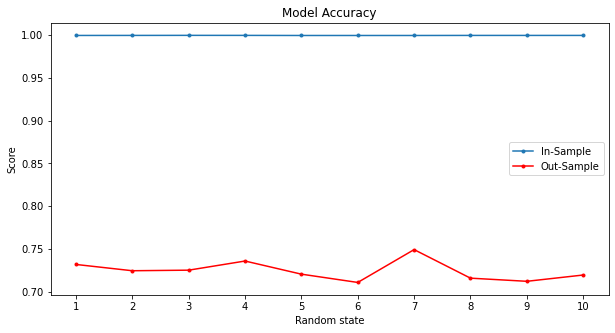

In [6]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), In, '.-')
plt.plot(range(1,11), Out, 'r.-')
plt.xlabel('Random state')
plt.ylabel('Score')
plt.legend(('In-Sample', 'Out-Sample'))
plt.xticks(range(1,11))
plt.title('Model Accuracy')
_=plt.show()

# Part 2: Cross validation


In [7]:
#cross-validation in-sample with K-fold cv
cv_score_in =cross_val_score(pipeline, X_train, y_train, cv=10, n_jobs=-1)
print([float('{:.4f}'.format(i)) for i in cv_score_in])
print('Mean In-Sample: %.4f, std: %.4f' % (np.mean(cv_score_in), np.std(cv_score_in)))

[0.7174, 0.7274, 0.7248, 0.7322, 0.7278, 0.7407, 0.7367, 0.7259, 0.7296, 0.7256]
Mean In-Sample: 0.7288, std: 0.0062


In [8]:
#cross-validation out-sample with K-fold cv
cv_score_out =cross_val_score(pipeline, X_test, y_test, cv=10, n_jobs=-1)
print([float('{:.4f}'.format(i)) for i in cv_score_out])
print('Mean Out-Sample: %.4f, std: %.4f' % (np.mean(cv_score_out), np.std(cv_score_out)))

[0.7333, 0.7167, 0.7233, 0.69, 0.7267, 0.7067, 0.7133, 0.75, 0.7433, 0.7267]
Mean Out-Sample: 0.7230, std: 0.0166


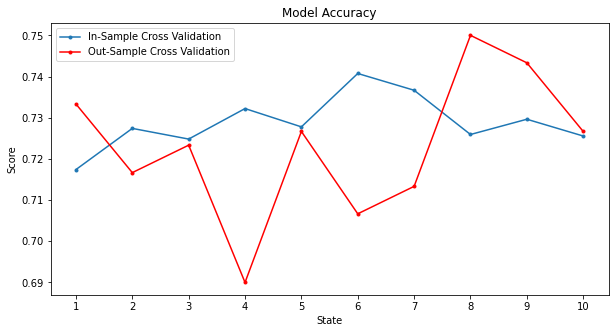

In [9]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), cv_score_in, '.-')
plt.plot(range(1,11), cv_score_out, 'r.-')
plt.xlabel('State')
plt.ylabel('Score')
plt.legend(('In-Sample Cross Validation', 'Out-Sample Cross Validation'))
plt.xticks(range(1,11))
plt.title('Model Accuracy')
_=plt.show()

# Part 3: Conclusions

From the two Model Accuracy plots (using Random State Test and Cross Validation), we can see that:
1. All cases in Random State Test have higher in-sample accuracy scores (very close to 1.00) and lower out-sample accuracy scores (near 0.72). Thus, the problem of model overfitting was not remedied by the method of ramdom-state.
2. Cases in Cross Validation have similar accuracy scores for in-sample and out-sample cases (Mean In-Sample: 0.7288, std: 0.0062 & Mean Out-Sample: 0.7230, std: 0.0166). We can see that overfitting is not longer a problem with Cross Validation methods.

Thus, we can conclude that the Cross Validation method of measuring accuracy provides the best estimate of how a model will do against unseen data; however, Random State Test is more efficient to run, requring less calculation time.

# Part 4: Appendix

Link to github repo : https://github.com/TakumiDawn/Machine-Learning-in-Finance-Lab/tree/master/IE517_F20_HW6

In [11]:
print("My name is Takumi Li")
print("My NetID is: feiyang3")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Takumi Li
My NetID is: feiyang3
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
